In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

# Data Gathering

In [ ]:
uploaded = files.upload()
white = pd.read_csv(io.BytesIO(uploaded['winequality-white.csv']),sep=';')
red = pd.read_csv(io.BytesIO(uploaded['winequality-red.csv']),sep=';')

Saving winequality-red.csv to winequality-red.csv
Saving winequality-white.csv to winequality-white.csv


In [ ]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Data Assessment

## White Wine Data

In [ ]:
white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [ ]:
white.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
white.duplicated().sum()

937

### note:
- renaming the columns
- drop the duplicates

## Red Wine Data

In [ ]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
red.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
red.duplicated().sum()

240

### note:
- renaming the columns
- drop the duplicates

# Data Cleaning

## White Wine Data

### 1- Issue: renaming the columns

### Code

In [ ]:
cols = []
for col in white.columns:
  cols.append(col.replace(' ','_').lower())
white.columns = cols

### Test

In [ ]:
white.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

### 2- Issue: drop the duplicates

### Code

In [ ]:
white.drop_duplicates(inplace= True)

### Test

In [ ]:
white.duplicated().sum()

0

## Red Wine Data

### 1- Issue: renaming the columns

### Code

In [ ]:
cols = []
for col in red.columns:
  cols.append(col.replace(' ','_').lower())
red.columns = cols

### Test

In [ ]:
red.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

### 2- Issue: drop the duplicates

### Code

In [ ]:
red.drop_duplicates(inplace= True)

### Test

In [ ]:
red.duplicated().sum()

0

## Merging data

In [ ]:
red_col = np.repeat('red',red.shape[0])
white_col = np.repeat('white',white.shape[0])

In [ ]:
red['color'] = red_col
white['color'] = white_col

In [ ]:
df = white.append(red)
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,white


# EDA

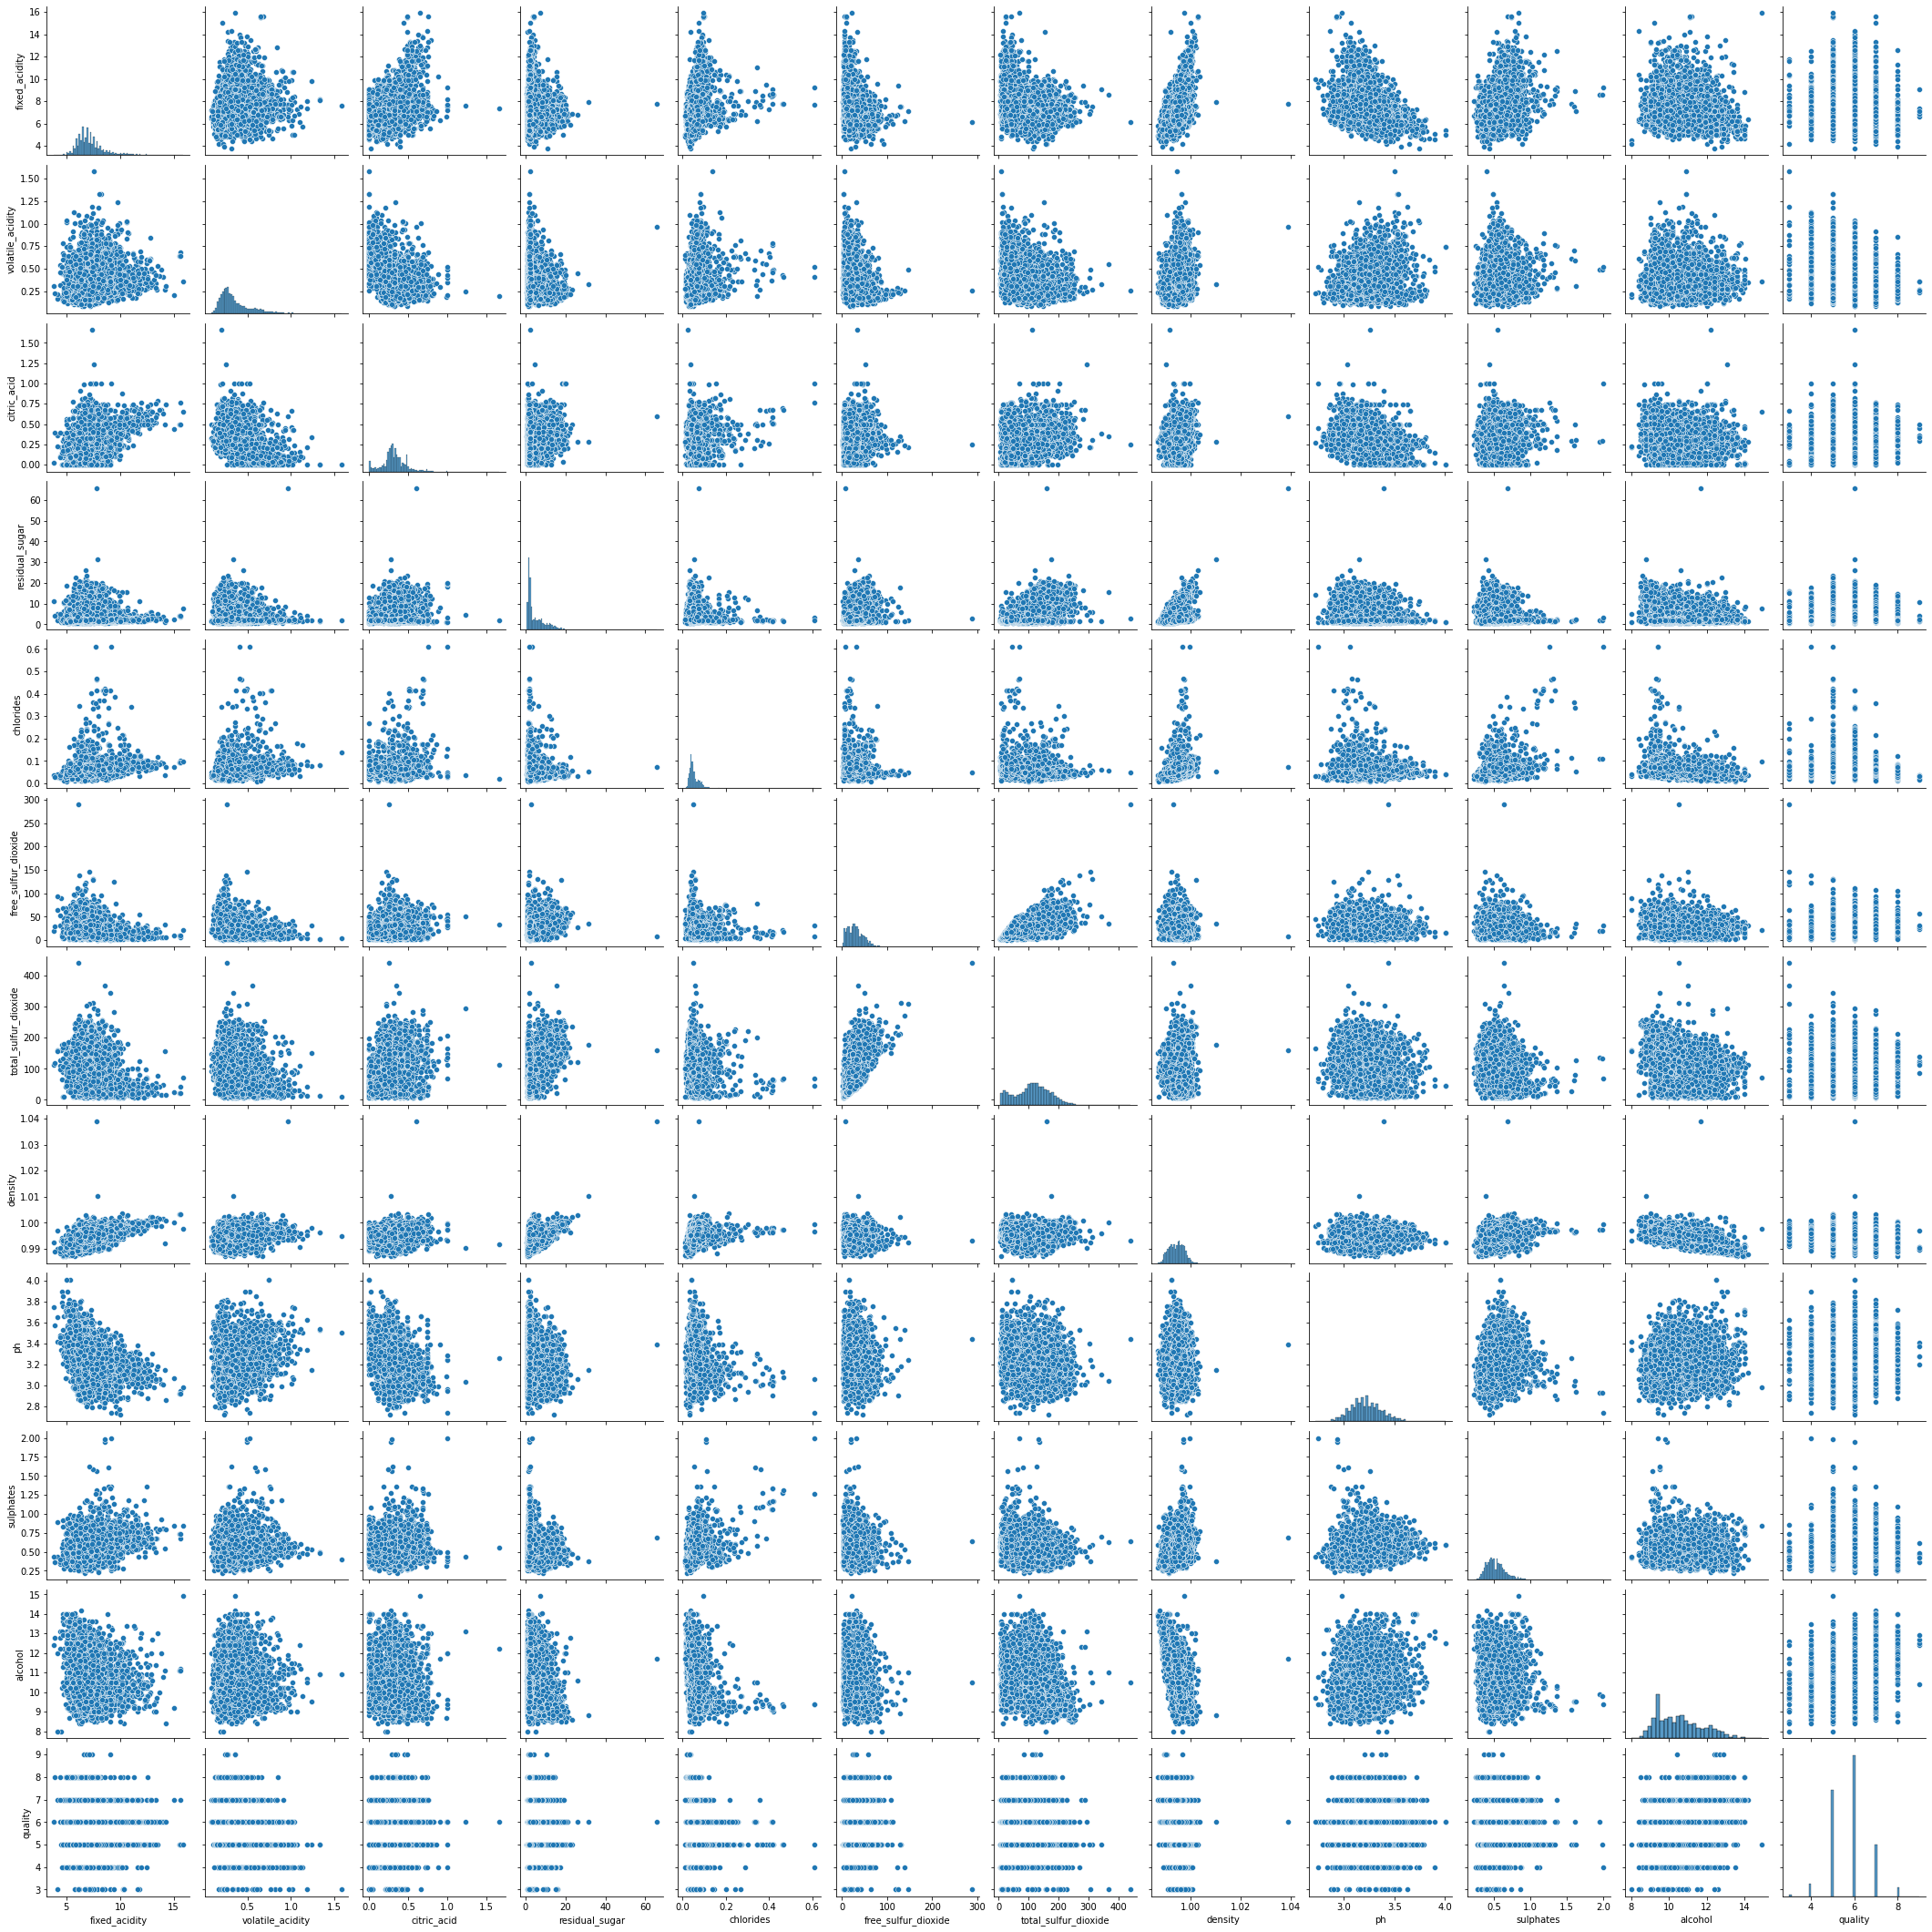

In [ ]:
sns.pairplot(df)

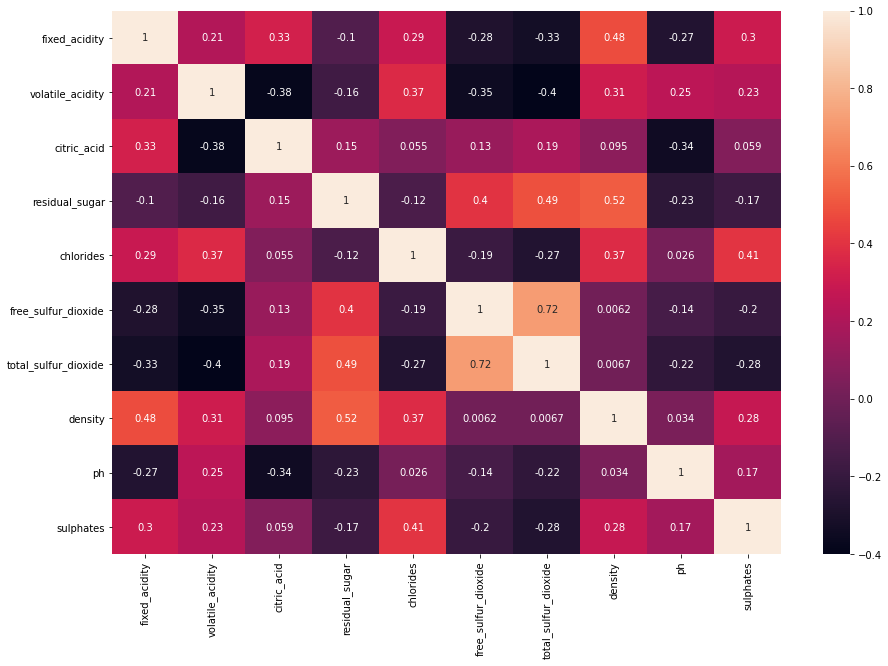

In [ ]:
corr = df.iloc[:,:-3].corr()
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr,annot=True)

# Conclusions

## Is a certain type of wine (red or white) associated with higher quality?

In [ ]:
quality_mean = df.groupby('color')['quality'].mean()
quality_mean

color
red      5.623252
white    5.854835
Name: quality, dtype: float64

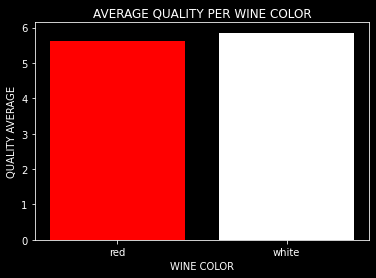

In [ ]:
locations = [1,2]
heights = [quality_mean[0],quality_mean[1]]
labels = ['red','white']
with plt.style.context('dark_background'):
    plt.bar(locations , heights , tick_label = labels,color = ['red','white'])
    plt.title('average quality per wine color'.upper())
    plt.xlabel('wine color'.upper())
    plt.ylabel('quality average'.upper())
plt.show()

## What level of acidity (pH value) receives the highest average rating?

In [ ]:
df.ph.describe()

count    5320.000000
mean        3.224664
std         0.160379
min         2.720000
25%         3.110000
50%         3.210000
75%         3.330000
max         4.010000
Name: ph, dtype: float64

In [ ]:
df['acidity_levels']= pd.cut(df.ph,bins= [df.ph.min(),3.11,3.21,3.33,df.ph.max()], labels=['High','Moderately High','Medium','Low'])

In [ ]:
acidity_quality_mean = df.groupby('acidity_levels')['quality'].mean()
acidity_quality_mean

acidity_levels
High               5.728024
Moderately High    5.766917
Medium             5.852624
Low                5.834254
Name: quality, dtype: float64

Text(0, 0.5, 'QUALITY AVERAGE')

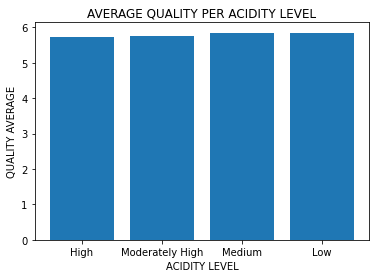

In [ ]:
locations = [1,2,3,4]
heights = [acidity_quality_mean[0],acidity_quality_mean[1],acidity_quality_mean[2],acidity_quality_mean[3]]
labels = ['High','Moderately High','Medium','Low']
plt.bar(locations , heights,tick_label = labels)
plt.title('average quality per acidity level'.upper())
plt.xlabel('acidity level'.upper())
plt.ylabel('quality average'.upper())

## Do wines with higher alcoholic content receive better ratings?

In [ ]:
median = df.alcohol.median()
low_alcohol = df.query('alcohol < {0}'.format(median))
high_alcohol = df.query('alcohol >= {0}'.format(median))
low_alcohol_mean = low_alcohol.quality.mean()
high_alcohol_mean = high_alcohol.quality.mean()

Text(0, 0.5, 'QUALITY AVERAGE')

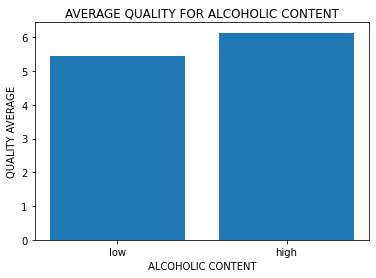

In [ ]:
locations = [1,2]
heights = [low_alcohol_mean,high_alcohol_mean]
labels = ['low','high']
plt.bar(locations , heights,tick_label = labels)
plt.title('average quality for alcoholic content'.upper())
plt.xlabel('alcoholic content'.upper())
plt.ylabel('quality average'.upper())

## Do sweeter wines (more residual sugar) receive better ratings?

In [ ]:
low_sugar = df.query('residual_sugar < {0}'.format(df.residual_sugar.median()))
high_sugar = df.query('residual_sugar >= {0}'.format(df.residual_sugar.median()))
low_quality_mean = low_sugar.quality.mean()
high_quality_mean = high_sugar.quality.mean()

Text(0, 0.5, 'QUALITY AVERAGE')

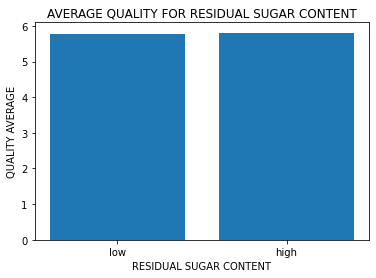

In [ ]:
locations = [1,2]
heights = [low_quality_mean,high_quality_mean]
labels = ['low','high']
plt.bar(locations,heights,tick_label = labels)
plt.title('average quality for residual sugar content'.upper())
plt.xlabel('residual sugar content'.upper())
plt.ylabel('quality average'.upper())

## What Are The Wine Color Proportions Per Quality?

In [ ]:
counts = df.groupby(['color','quality']).count().ph
total = df.groupby('color').count().ph

In [ ]:
white_count = counts['white']
white_count

quality
3      20
4     153
5    1175
6    1788
7     689
8     131
9       5
Name: ph, dtype: int64

In [ ]:
red_count = counts['red']
red_count[9] = 0
red_count

quality
3     10
4     53
5    577
6    535
7    167
8     17
9      0
Name: ph, dtype: int64

In [ ]:
red_proportion = red_count / total['red']
white_proportion = white_count / total['white']

In [ ]:
index = np.arange(len(red_proportion))
width = 0.40

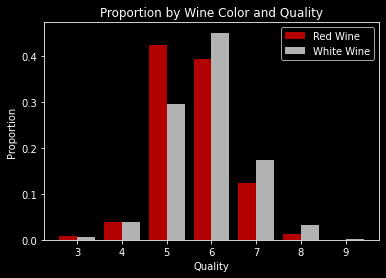

In [ ]:
plt.style.use('dark_background')
red_bars = plt.bar(index , red_proportion, width , alpha = 0.7 , color = 'red',label = 'Red Wine');
white_bars = plt.bar(index + width , white_proportion, width ,alpha = 0.7 , color = 'white',label = 'White Wine');
plt.title('Proportion by Wine Color and Quality');
plt.xlabel('Quality');
plt.ylabel('Proportion');
locations = index + width / 2
labels = [3,4,5,6,7,8,9]
plt.xticks(locations , labels);
plt.legend()